#### Assumptions in multilinear regression
>1) **Linearity:** The relationship between predictors(X) and response(Y) is linear

>2) **Independence:** Observations are independent of each other

>3) **Homoscedasticity:** The residuals(y-y_hat) exhibit constant variance at all levels of predictor


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import influence_plot
import numpy as np

In [2]:
cars = pd.read_csv("Cars.csv")
print(cars.head())


   HP        MPG  VOL          SP         WT
0  49  53.700681   89  104.185353  28.762059
1  55  50.013401   92  105.461264  30.466833
2  55  50.013401   92  105.461264  30.193597
3  70  45.696322   92  113.461264  30.632114
4  53  50.504232   92  104.461264  29.889149


## Description
> **MPG:** milage of car(mile per gallon) (Y col to be predicted)

> **HP:** Horse power of car (x1 col)

> **VOL:** Volume of car (X2 column) 

> **SP:** Top spped of cars (miles per hour) (x3 col)

> **WT:** Weight of car (Pounds) (X4 col)

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [5]:
cars.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [6]:
cars.duplicated(keep=False)

0     False
1     False
2     False
3     False
4     False
      ...  
76    False
77    False
78    False
79    False
80    False
Length: 81, dtype: bool

<Axes: xlabel='HP', ylabel='Count'>

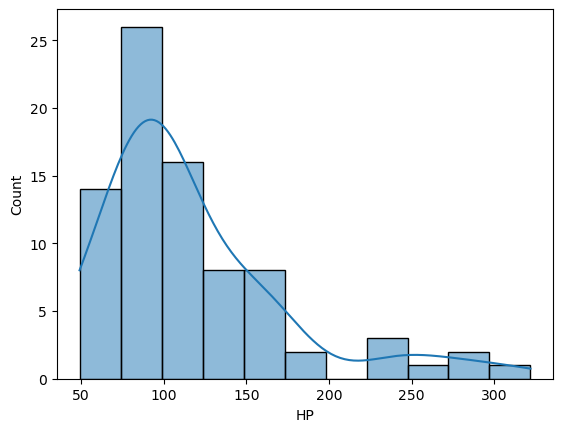

In [7]:
sns.histplot(cars["HP"],kde=True)

<Axes: xlabel='MPG', ylabel='Count'>

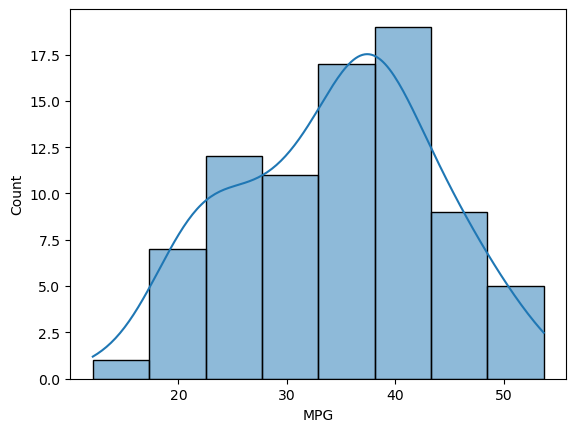

In [8]:
sns.histplot(cars["MPG"],kde=True)

<Axes: xlabel='VOL', ylabel='Count'>

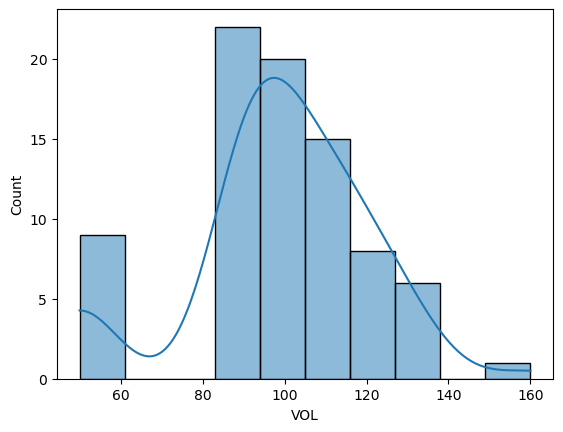

In [9]:
sns.histplot(cars["VOL"],kde=True)

<Axes: xlabel='SP', ylabel='Count'>

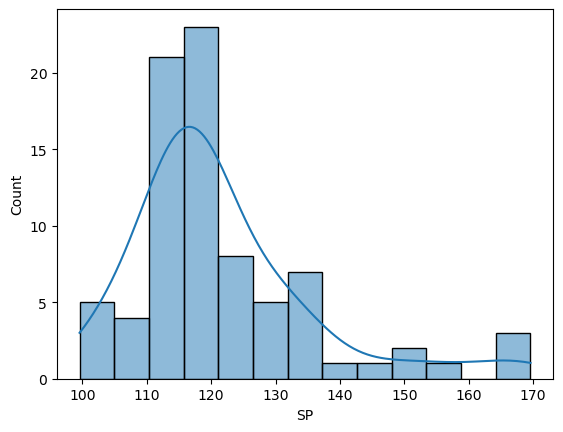

In [10]:
sns.histplot(cars["SP"],kde=True)

<Axes: xlabel='WT', ylabel='Count'>

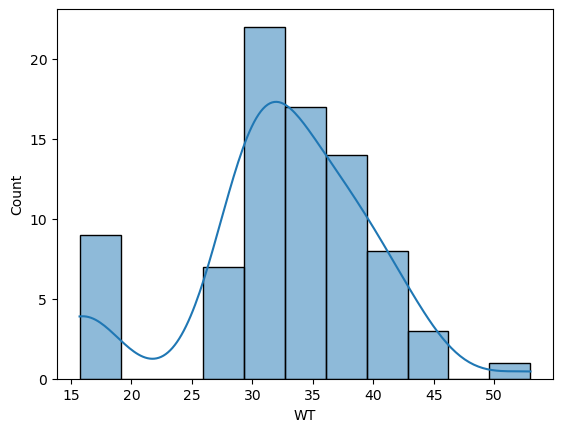

In [11]:
sns.histplot(cars["WT"],kde=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x1c563a92480>,
 'caps': [<matplotlib.lines.Line2D at 0x1c563b487d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c563b48050>],
 'medians': [<matplotlib.lines.Line2D at 0x1c563b48d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c563b48fe0>],
 'means': []}

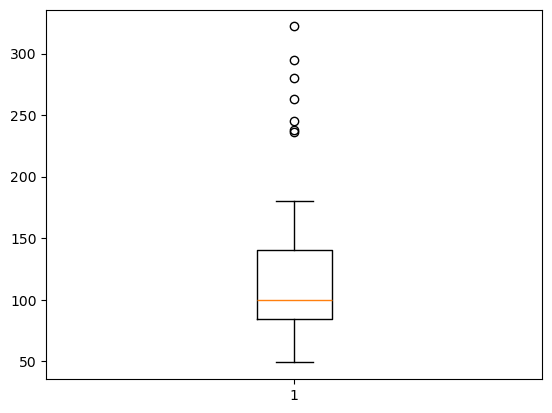

In [12]:
plt.boxplot(cars["HP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c563b9de80>,
 'caps': [<matplotlib.lines.Line2D at 0x1c563b9e450>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c563b9dca0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c563b9e990>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c563b9ebd0>],
 'means': []}

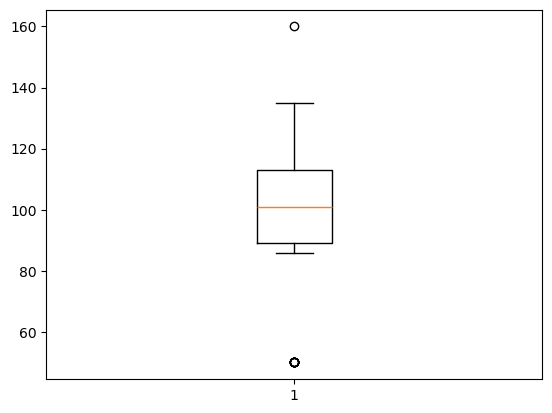

In [13]:
plt.boxplot(cars["VOL"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c563c10290>,
 'caps': [<matplotlib.lines.Line2D at 0x1c563c10800>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c563bdbfe0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c563c10dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c563a3fd70>],
 'means': []}

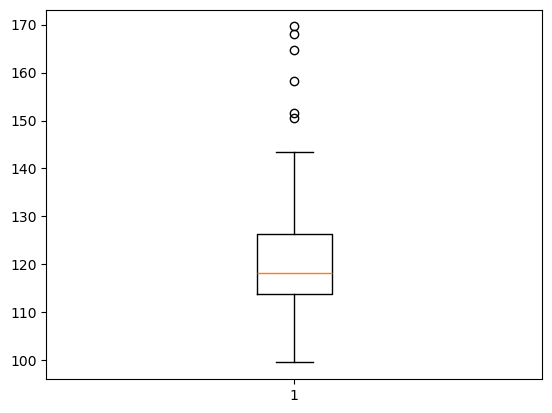

In [14]:
plt.boxplot(cars["SP"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c563c6c620>,
 'caps': [<matplotlib.lines.Line2D at 0x1c563c6cad0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c563c6c350>],
 'medians': [<matplotlib.lines.Line2D at 0x1c563c6d0d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c563c6d340>],
 'means': []}

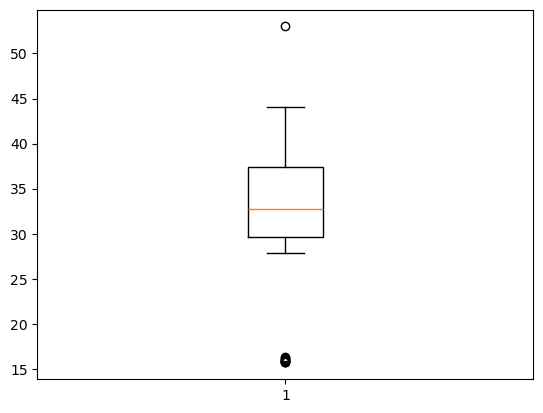

In [15]:
plt.boxplot(cars["WT"])

{'whiskers': [<matplotlib.lines.Line2D at 0x1c563cafa10>,
 'caps': [<matplotlib.lines.Line2D at 0x1c563cafec0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c563caf7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c563ce4380>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c563ce45c0>],
 'means': []}

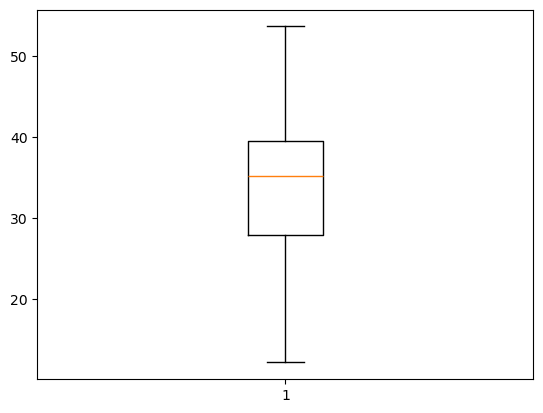

In [16]:
plt.boxplot(cars["MPG"])

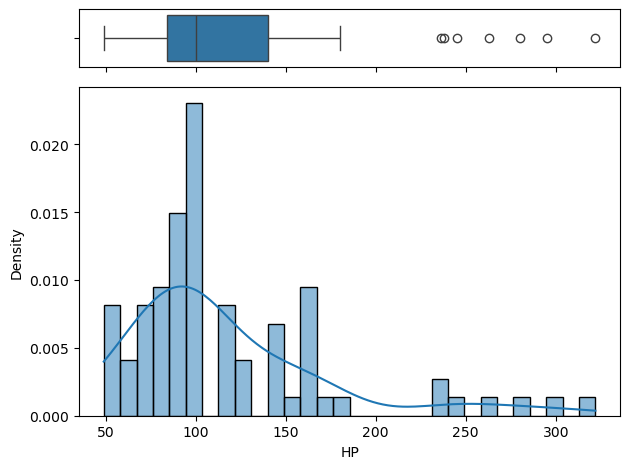

In [17]:

fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='HP',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='HP',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

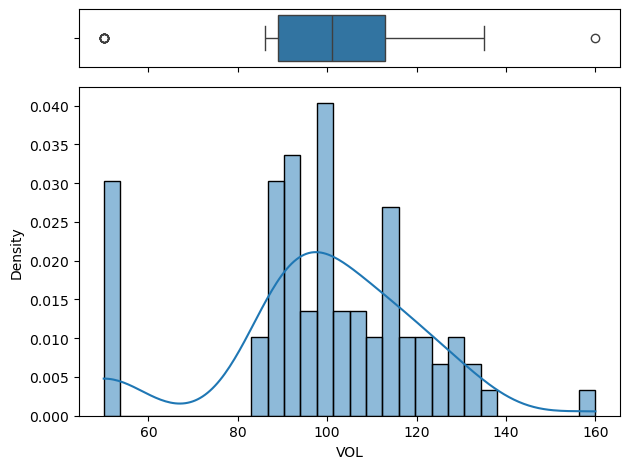

In [18]:

fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='VOL',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='VOL',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

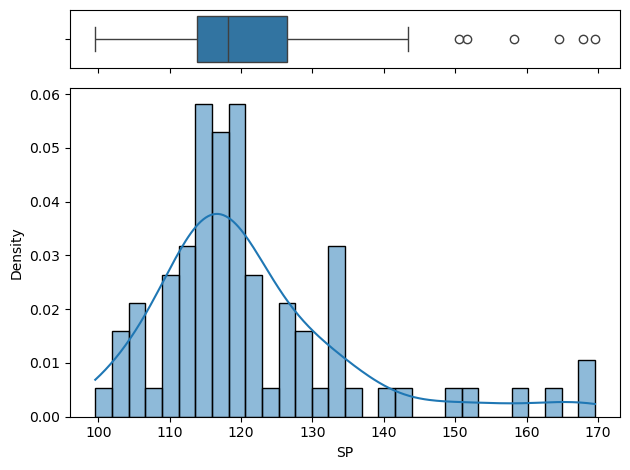

In [19]:

fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='SP',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='SP',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

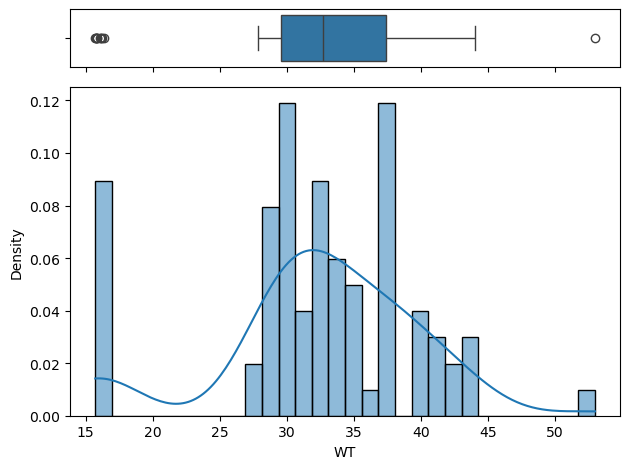

In [20]:

fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='WT',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='WT',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

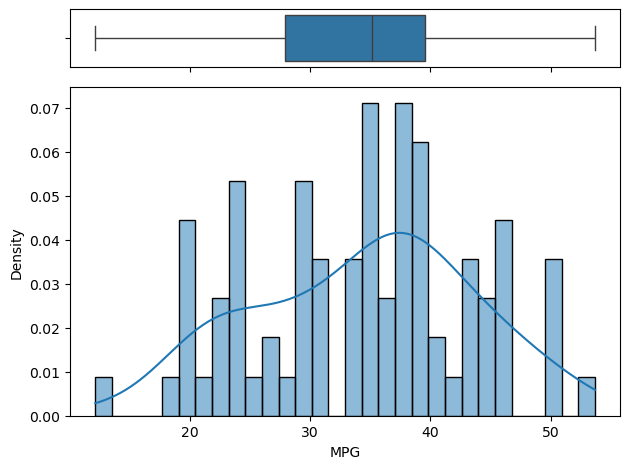

In [21]:

fig,(ax_box,ax_hist)=plt.subplots(2,sharex=True, gridspec_kw={"height_ratios":(.15,.85)})
sns.boxplot(data=cars,x='MPG',ax=ax_box,orient='h')
ax_box.set(xlabel='')
sns.histplot(data=cars,x='MPG',ax=ax_hist,bins=30,kde=True,stat="density")
ax_hist.set(ylabel='Density')
plt.tight_layout()
plt.show()

#### Observations from boxplot and hu=istograms
> There ae some extreme values(outliers) observed in towards the right tail of SP and HP distributions
 
> In VOL and WT columns, a few outliers are obderves in both tails of their distributions

> The extreme values of cars data may have come from the soecially designed nature of cars

> As this is multidimensional dataa the outliers with respect to spatial dimendsions may have to be considered while building regression model 





In [22]:
# Checking for duplicated rows
cars[cars.duplicated(keep=False)]

,HP,MPG,VOL,SP,WT


In [23]:
# Rearrange the column
cars = pd.DataFrame(cars,columns=["HP","VOL","SP","WT","MPG"])
cars.head()

,HP,VOL,SP,WT,MPG
0,49,89,104.185353,28.762059,53.700681
1,55,92,105.461264,30.466833,50.013401
2,55,92,105.461264,30.193597,50.013401
3,70,92,113.461264,30.632114,45.696322
4,53,92,104.461264,29.889149,50.504232


In [24]:
cars.corr()

,HP,VOL,SP,WT,MPG
HP,1.000000,0.077459,0.973848,0.076513,-0.725038
VOL,0.077459,1.000000,0.102170,0.999203,-0.529057
SP,0.973848,0.102170,1.000000,0.102439,-0.687125
WT,0.076513,0.999203,0.102439,1.000000,-0.526759
MPG,-0.725038,-0.529057,-0.687125,-0.526759,1.000000


#### Observations:
> `VOL` and `WT` have highest positive correlation of value=**0.999203**

> `SP` and `HP` have second highest positive correlation of value=**0.973848**

> `WT` and `HP` has Least positive correlation of value=**0.076513**

> `MPG` and `HP` have highest negative correlation of value= **-0.725038**


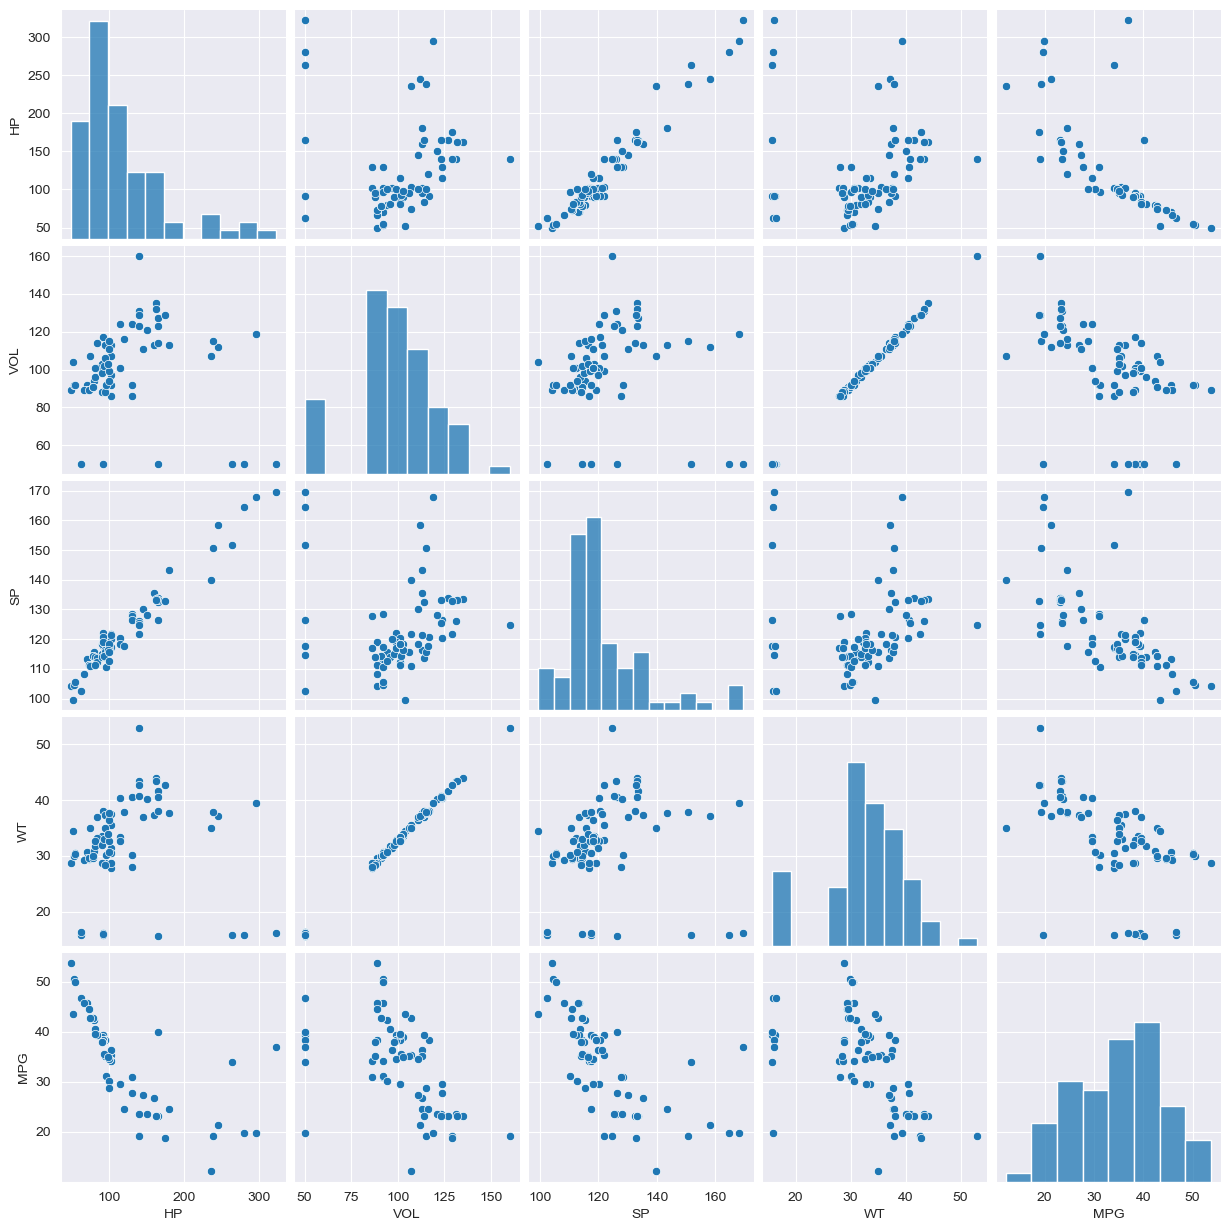

In [25]:
# Pair plot
sns.set_style(style='darkgrid')
sns.pairplot(cars)

In [26]:
#Build model
model1=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [27]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     63.80
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           1.54e-23
Time:                        12:21:25   Log-Likelihood:                -233.96
No. Observations:                  81   AIC:                             477.9
Df Residuals:                      76   BIC:                             489.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.6773     14.900      2.059      0.043       1.001      60.354
WT             0.4006      1.693      0.237      0.814      -2.972       3.773
VOL           -0.3361      0.569     -0.591      0.556      -1.469       0.796
SP             0.3956      0.158      2.500      0.015       0.080       0.711
HP            -0.2054      0.039     -5.239      0.000      -0.284      -0.127
==============================================================================
Omnibus:                       10.780   Durbin-Watson:                   1.403
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               11.722
Skew:                           0.707   Prob(JB):                      0.00285
Kurtosis:                       4.215   Cond. No.                     6.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Observations from model summary
> The R-squared and adj R-squared values are good and about 75% of variability in Y is explaines by X columns

> The probability value with respect to F-statistics is close to zero indicating that all or someof x columns are significant

> The p-values for VOL and WT are higher than 5% indicating some interaction issue amoung themseleves which need to be further explored




## Performance metric for model1

In [61]:
df1=pd.DataFrame()
df1["actual_y1"]=cars['MPG']
df1.head()

,actual_y1
0,53.700681
1,50.013401
2,50.013401
3,45.696322
4,50.504232


In [29]:
cars.iloc[:,0:4]

,HP,VOL,SP,WT
0,49,89,104.185353,28.762059
1,55,92,105.461264,30.466833
2,55,92,105.461264,30.193597
3,70,92,113.461264,30.632114
4,53,92,104.461264,29.889149
...,...,...,...,...
76,322,50,169.598513,16.132947
77,238,115,150.576579,37.923113
78,263,50,151.598513,15.769625
79,295,119,167.944460,39.423099


In [62]:
pred_y1=model1.predict(cars[['HP','VOL','SP','WT']])
print(pred_y1)

0     43.441935
1     42.388793
2     42.279341
3     42.538360
4     42.172648
        ...    
76    21.282096
77    17.899050
78    26.136453
79    12.316612
80    15.559481
Length: 81, dtype: float64


In [63]:
# Predict for the given X data columns
pred_y1 = model1.predict(cars.iloc[:,0:4])
df1["pred_y1"] = pred_y1
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


In [64]:
mse=np.mean((df1["actual_y1"]-df1["pred_y1"])**2)
rmse=np.sqrt(mse)
print("mse: ",mse)
print("rmse:",rmse)

mse:  18.897141152343096
rmse: 4.347084212704315


In [32]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(df1["actual_y1"],df1["pred_y1"])
print("MSE: ",mse)
print("RMSE: ",np.sqrt(mse))


MSE:  18.897141152343096
RMSE:  4.347084212704315


In [39]:
# Compute VIF values
rsq_hp=smf.ols('HP~WT+VOL+SP',data=cars).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_wt=smf.ols('WT~HP+VOL+SP',data=cars).fit().rsquared
vif_wt=1/(1-rsq_wt)

rsq_vol=smf.ols('VOL~WT+HP+SP',data=cars).fit().rsquared
vif_vol=1/(1-rsq_vol)

rsq_sp=smf.ols('SP~WT+VOL+HP',data=cars).fit().rsquared
vif_sp=1/(1-rsq_sp)
# Storing vif values in a data frame
d1 = {'Variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_wt,vif_vol,vif_sp]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


## Observations for VIF values
> The ideal range of vif values shall be b/w 0 to 10 .However slightly higher values can be tolerated

> As seen from very high VIF values for vol and WT it is clear that they are prone to multicollineraity problem

> So it is decided to drop one of col(WT or VOL) to overcome multicollinearity




In [65]:
cars1=cars.drop("WT",axis=1)
cars1.head()

,HP,VOL,SP,MPG
0,49,89,104.185353,53.700681
1,55,92,105.461264,50.013401
2,55,92,105.461264,50.013401
3,70,92,113.461264,45.696322
4,53,92,104.461264,50.504232


In [66]:
mod2=smf.ols('MPG~HP+VOL+SP',data=cars1).fit()
mod2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    MPG   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     86.11
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           1.56e-24
Time:                        12:56:09   Log-Likelihood:                -233.99
No. Observations:                  81   AIC:                             476.0
Df Residuals:                      77   BIC:                             485.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.9234     14.466      2.069      0.042       1.118      58.729
HP            -0.2067      0.039     -5.353      0.000      -0.284      -0.130
VOL           -0.2017      0.023     -8.928      0.000      -0.247      -0.157
SP             0.4007      0.156      2.571      0.012       0.090       0.711
==============================================================================
Omnibus:                       10.810   Durbin-Watson:                   1.389
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.822
Skew:                           0.704   Prob(JB):                      0.00271
Kurtosis:                       4.233   Cond. No.                     5.87e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.87e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [67]:
df1.head()

,actual_y1,pred_y1
0,53.700681,43.441935
1,50.013401,42.388793
2,50.013401,42.279341
3,45.696322,42.538360
4,50.504232,42.172648


In [68]:
df1["actual_y2"]=cars["MPG"]
df1.head()

,actual_y1,pred_y1,actual_y2
0,53.700681,43.441935,53.700681
1,50.013401,42.388793,50.013401
2,50.013401,42.279341,50.013401
3,45.696322,42.538360,45.696322
4,50.504232,42.172648,50.504232


In [69]:
pred_y2=mod2.predict(cars1[['HP','VOL','SP']])
print(pred_y2)
df1['pred_y2']=pred_y2
df1.head()


0     43.590769
1     42.256794
2     42.256794
3     42.361497
4     42.269544
        ...    
76    21.233143
77    17.867725
78    26.216856
79    12.237554
80    15.592958
Length: 81, dtype: float64


,actual_y1,pred_y1,actual_y2,pred_y2
0,53.700681,43.441935,53.700681,43.590769
1,50.013401,42.388793,50.013401,42.256794
2,50.013401,42.279341,50.013401,42.256794
3,45.696322,42.538360,45.696322,42.361497
4,50.504232,42.172648,50.504232,42.269544


In [70]:
mse=np.mean((df1["actual_y2"]-df1["pred_y2"])**2)
rmse=np.sqrt(mse)
print("mse: ",mse)
print("rmse:",rmse)

mse:  18.91105338871122
rmse: 4.34868409851891


## Observations from model2
> The adjusted R squared value improved slightly to .76

> All p-values for model parameters are less than 5% hence they are significant

> Therefore HP,VOL,SP col are finalized as significant predictor for MPG ressponse variable

> **There is no improvement in MSE value**